> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigating gapminder data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [283]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Load and inspect data

In this section, I will inspect the different datasets individually\
to familiarize myself with them and prepare them for the following analysis.

In [284]:
#load population over time dataset
pop = pd.read_csv('./gapminder_data/population_total.csv')
display(pop.info())
display(pop.head())

#load dataset with CO2 emissions per country over time
co2 = pd.read_csv('./gapminder_data/co2_emissions_tonnes_per_person.csv')
display(co2.describe())
display(co2.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: object(302)
memory usage: 464.9+ KB


None

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,5.000000,5.000000,7.000000,5.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.523786,0.517832,0.659911,0.570422,0.489042,0.590578,0.611746,0.526380,0.599746,0.593316,...,4.623215,4.725098,4.668183,4.722525,4.638652,4.598566,4.496805,4.466514,4.490955,4.499112
std,1.093672,1.085826,1.065140,1.201775,1.083367,1.224113,1.279321,1.148889,1.252499,1.239320,...,6.102350,6.137543,6.049405,6.201106,5.915767,6.024297,5.802658,5.636840,5.647153,5.604449
min,0.007330,0.007160,0.006980,0.006810,0.006650,0.006490,0.006330,0.006180,0.006030,0.005880,...,0.022700,0.030400,0.036600,0.034200,0.041900,0.038300,0.036700,0.025400,0.024400,0.024300
25%,0.042200,0.029300,0.038150,0.028300,0.050025,0.051700,0.047300,0.043425,0.043800,0.044700,...,0.543500,0.609000,0.622500,0.635000,0.670250,0.677000,0.672500,0.694250,0.686750,0.688750
50%,0.044200,0.043800,0.049400,0.046800,0.052050,0.053400,0.049700,0.054600,0.052600,0.049200,...,2.380000,2.420000,2.375000,2.490000,2.460000,2.510000,2.525000,2.500000,2.535000,2.540000
75%,0.045200,0.048900,1.018350,0.050200,0.068625,0.061300,0.055400,0.113550,0.056300,0.056800,...,6.142500,6.437500,6.635000,6.575000,6.235000,6.182500,5.895000,6.062500,6.032500,6.015000
max,2.480000,2.460000,2.450000,2.720000,2.700000,2.780000,2.900000,2.870000,2.840000,2.810000,...,41.500000,38.800000,39.200000,42.500000,36.000000,43.100000,41.300000,38.500000,39.800000,38.000000


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


In [285]:
#compare countries
display(pop.country.nunique())
display(co2.country.nunique())

#save country columns as sets and
#look at the difference
pop_countries = set(pop.country)
co2_countries = set(co2.country)
print(pop_countries.difference(co2_countries))

197

194

{'Monaco', 'Holy See', 'San Marino'}


## Drop unneeded rows and columns

There are three countries that do not appear in both datasets.\
Since all of them are very small countries that won't be needed for the analysis,\
I'm going to drop these rows from the population dataset.

In [286]:
#save indexes of countries to drop
to_drop = pop[pop['country'].isin(['Monaco', 'Holy See', 'San Marino'])].index
#drop rows
pop.drop(to_drop, axis=0, inplace=True)

#check if number of countries matches now
display(pop.country.nunique() == co2.country.nunique())           

True

I want to look at data only from 1950 to 2018,\
so I remove the columns I don't need.

In [287]:
# drop data from 1800 to 1949 from both datasets
pop.drop(pop.loc[:, '1800':'1949'], axis=1, inplace=True)
co2.drop(co2.loc[:, '1800':'1949'], axis=1, inplace=True)

#drop data after 2018 from population 
pop.drop(pop.loc[:, '2019':], axis=1, inplace=True)

In [288]:
pop.query('country == "India"')

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
79,India,376M,382M,389M,396M,403M,410M,417M,425M,433M,...,1.22B,1.23B,1.25B,1.27B,1.28B,1.3B,1.31B,1.32B,1.34B,1.35B


## Handle missing data

In [299]:
#check for NaN values
missing_pop = pop.isna().sum().any()
missing_co2 = co2.isna().sum().any()
print(missing_pop, missing_co2)

co2['missing'] = co2.apply(lambda x: True if co2.isna().sum() != 0 else False)
print(co2.head())

False True


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

The CO2 data has missing, values. To see if there are a lot\
look at chart of partial data.

<AxesSubplot:>

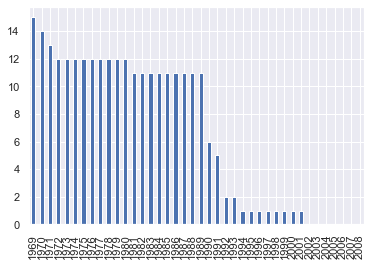

In [290]:
co2.iloc[:, 20:60].isna().sum().plot(kind='bar')

In [291]:
co2_means = co2.iloc[:,1:].mean(axis=1)

In [292]:
countries = co2['country']
countries 

co2.drop(columns=['country'], inplace=True)
co2.interpolate(method='values', axis=0, inplace=True)


#co2.iloc[:,1:].info(verbose=True)


In [293]:
co2.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,missing
0,0.010900,0.011700,0.011500,0.013200,0.013100,0.018600,0.021800,0.034400,0.038000,0.0436,...,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254,NaN
1,0.041100,0.054000,0.066100,0.057000,0.070600,0.082200,0.097700,0.119000,0.112000,0.1150,...,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120,NaN
2,0.235000,0.313000,0.284000,0.307000,0.363000,0.467000,0.576000,1.000000,0.779000,0.9100,...,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590,NaN
3,0.743333,0.878667,0.869333,0.851333,0.905333,1.014667,1.157333,1.483333,1.262667,0.5180,...,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120,NaN
4,1.251667,1.444333,1.454667,1.395667,1.447667,1.562333,1.738667,1.966667,1.746333,0.1260,...,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400,NaN


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [294]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [295]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [296]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!